In [1]:
# IMPORT STATEMENTS

import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
from anndata import AnnData
import scanpy as sc
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import bone
reload(bone)

sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

In [2]:
def getSViP():
    l1 = [bone.readList("covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

def getSimpleName(gene_groups, h):
    res = []
    for s in gene_groups:
        s1 = set()
        for g in s:
            for id1 in h.getIDs(g):
                name = h.getSimpleName(id1)
                if name != "" and name != "---":
                    s1.add(name)
        res.append(s1)
    return res

def getMacGeneGroups(order = None, weight = None, debug = 1):
    reload(hu)
    db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
    h = hu.Hegemon(db.getDataset("GL4"))
    h.init()
    h.initPlatform()
    h.initSurv()
    data_item = []
    dir1 = "/booleanfs2/sahoo/Data/Macrophage/BN/"
    with open(dir1 + 'figures/path-1.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-0.json') as data_file:
        l1 = json.load(data_file)
        data_item[5] = l1[5]
        data_item[6] = l1[6]
    with open(dir1 + 'figures/path-2.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-3.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-4.json') as data_file:
        data_item += json.load(data_file)
    cfile = dir1 + "figures/mac-net-cls.txt"
    if not os.path.isfile(cfile):
        print ("Can't open file {0} <br>".format(cfile))
        exit()
    fp = open(cfile, "r")
    nodelist = {}
    nhash = {}
    for line in fp:
        line = line.strip();
        ll = line.split("\t");
        nodelist[ll[0]] = ll[2:]
        for i in ll[2:]:
            nhash[i] = ll[0];
    fp.close();
    gene_groups = []
    for i in range(len(data_item)):
        gene_groups.append(set())
        gn = data_item[i][2][0][0]
        for g in data_item[i][2]:
            gene_groups[i].add(g[0])
            if g[0] in nodelist:
                for k in nodelist[g[0]]:
                    gene_groups[i].add(k)
        for g in data_item[i][3]:
            gene_groups[i].add(g)
            if g in nodelist:
                for k in nodelist[g]:
                    gene_groups[i].add(k)
        if debug == 1:
            print (i, gn, h.getSimpleName(gn), data_item[i][0], len(gene_groups[i]))
    print([len(s) for s in gene_groups])
    if order is None:
        order = [1, 3, 4, 5];
        order = [35]
        order = [43, 44, 45];
        order = [8, 9, 10]
    gene_groups = [gene_groups[i] for i in order]
    print([len(s) for s in gene_groups])
    gene_groups = getSimpleName(gene_groups, h)
    print([len(s) for s in gene_groups])
    if weight is None:
        weight = [-1, 1, 2, 3]
        weight = [-1, -2, -3]
        weight = [-1]
        weight = [-1, -2, -3]
    print (weight)
    genes = bone.readGenes(dir1 + "figures/cluster-names.txt")
    return genes, weight, gene_groups

def getCls13a14a3():
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls13():
    order = [13]
    wt1 = [-1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls14a3():
    order = [14, 3]
    wt1 = [1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def processOne(ana, order, wt1, ax1, ax2, id1 = None, l1=None, violin=1):
    genes = []
    if (l1 is None):
        nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
        sel = 2
        genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.orderData(l1, wt1)
    if id1 is None:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'ax': ax1, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        res = ana.getROCAUC()
        ax.text(len(ana.cval[0]), 4, res)
        if (violin == 1):
            params['ax'] = ax2
            params['vert'] = 0
            ax = ana.printViolin(None, params)
        else:
            ax = ana.densityPlot(ax2, acolor)
        return ana
    else:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        if (violin == 1):
            ax = ana.printViolin(None, {'vert':0})
        else:
            ax = ana.densityPlot()
    expr = ana.h.getExprData(id1)
    c = [acolor[ana.aval[i]] for i in ana.order]
    a = [ana.aval[i] for i in ana.order]
    x = [float(expr[i]) for i in ana.order]
    y = [ana.f_ranks[i - ana.h.start] for i in ana.order]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['c'] = c
    df['a'] = a
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    for i in range(len(ana.atypes)):
        cond1 = (df['a'] == i)
        if (sum(cond1) > 0):
            s1 = np.max(df[cond1]['y']) - np.min(df[cond1]['y'])
            s2 = np.max(df[cond1]['x']) - np.min(df[cond1]['x'])
            df.loc[cond1, 'y'] += (np.mean(df[cond1]['x']) - df.loc[cond1, 'x']) * (s1+1) / (s2+1)
            df.loc[cond1, 'x'] -= (np.mean(df[cond1]['y']) - df.loc[cond1, 'y']) * (s2+1) / (s1+1)
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(df['x']).reshape(-1, 1),df['y'])
    y_pred = linreg.predict(np.array(df['x']).reshape(-1, 1))
    df['y1'] = (df['y'] - y_pred)
    ax = df.plot('x', 'y1', c=c, kind = 'scatter')
    ana.addAxes(ax)
    ana.f_ranks = df['y1']
    ana.i1 = [ana.order[i] for i in np.argsort(ana.f_ranks)]
    ana.f_ranks = [0 for i in ana.h.aRange()]
    for i in range(len(ana.order)):
        ana.f_ranks[ana.order[i] - ana.h.start] = df['y1'][i]
    index = np.array([i - ana.h.start for i in ana.i1])
    ana.cval = np.array([[ana.aval[i] for i in ana.i1]])
    ana.data = np.array([ana.expr[i] for i in ana.ind_r])[:,index]

    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    if (violin == 1):
        params['ax'] = ax2
        params['vert'] = 0
        ax = ana.printViolin(None, params)
    else:
        ax = ana.densityPlot(ax2, acolor)

    return ana

def processDataHnorm(ana, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13]
    wt1 = [-1]
    processOne(ana, order, wt1, ax1, ax2, id1)
    order = [14, 3]
    wt1 = [1, 2]
    processOne(ana, order, wt1, ax3, ax4, id1)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    processOne(ana, order, wt1, ax5, ax6, id1)
    return fig

def processDataHMm(ana, violin=1):
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    sel = 2
    order = [13]
    wt1 = [-1]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax = plt.subplot2grid((4, 3), (0, 0))
    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
              'genes': genes, 'ax': ax, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    ax = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax2 = plt.subplot2grid((4, 3), (0, 1))
    ax3 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    if (violin == 1):
        params['ax'] = ax
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13")
    else:
        ax = ana.densityPlot(ax, acolor)
        ax.set_ylabel("Density - Cluster \\#13")
    #plt.tight_layout()
    order = [14, 3]
    wt1 = [1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#14-3")
    ax2 = plt.subplot2grid((4, 3), (0, 2))
    ax3 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    ana.convertMm(l1, genes)
    ana.orderData(ana.gene_groups, wt1)
    print(" ".join([str(ana.atype[i]) for i in ana.i1]))
    #ana.normMacrophageGene("TYROBP", {"thr":1})
    #ana.normMacrophageGene("FCER1G", {"thr":3, "tval":6.5, "select":sel})
    print(len(ana.col_labels), len(ana.row_ids))
    params.update({'ax':ax2})
    ax = ana.printTitleBar(params)
    res = ana.getMetrics(ana.cval[0])
    ax.text(len(ana.cval[0]), 4, ",".join(res))
    if (violin == 1):
        params['ax'] = ax3
        params['vert'] = 0
        ax = ana.printViolin(None, params)
        ax.set_ylabel("Violin - Cluster \\#13-14-3")
    else:
        ax = ana.densityPlot(ax3, acolor)
        ax.set_ylabel("Density - Cluster \\#13-14-3")
    return fig

def getHigh(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    fp = ana.h.fp;
    fp.seek(0, 0);
    h = fp.readline();
    res = []
    index = 0
    for line in fp:
        line = line.strip();
        ll = line.split("\t")
        l1 = [i for i in order if i < len(ll) and
              ll[i] != '' and float(ll[i]) > thr]
        if len(l1) > nthr:
            res.append([ll[0], ana.h.getSimpleName(ll[0]), len(l1)])
        index += 1
        if (index % 1000) == 0:
            print(index)
    return res

def getHighJava(ana, tn=0, thr=2.0, nthr=10):
    order = [i for i in ana.order if ana.aval[i] == tn]
    ofh = open(".arrorder", "w")
    for i in order:
        ofh.write(ana.headers[i] + "\n")
    ofh.close()
    from subprocess import check_output
    cmd = ['java', '-cp', '/booleanfs2/sahoo/Hegemon',
           'tools.Hegemon', 'high', ana.h.getPre(),
           '.arrorder', str(thr), str(nthr)]
    result = check_output(cmd, input='')
    l1 = result.decode('utf-8').split('\n')
    res = [k.split('\t') for k in l1 if k != '']
    res = [[k[0], ana.h.getSimpleName(k[0]), k[1]] for k in res]
    return res

def getCls14a3v2():
    l1 = [['RPS16', 'RPS21', 'RPL6', 'CCDC88A', 'RPL3', 'RPS15A', 'RPL14',
        'PCBP2', 'RPL23', 'RPL13', 'METTL7A'],
        ['CLEC10A', 'ANXA4', 'UBL3', 'RPS21', 'RPL6', 'RPS15A', 'ARL4C',
            'RPL14', 'HEXA', 'METTL7A', 'RPS16']]
    l1 = [['RPL24', 'NACA', 'RPS16', 'RPS21', 'RPL6', 'CCDC88A',
        'RPL3', 'RPS15A', 'EEF1B2', 'RPL14', 'PCBP2', 'RPL23',
        'RPL13', 'METTL7A', 'EEF2'],
        ['CLEC10A', 'INPP5A', 'NACA', 'ANXA4', 'UBL3', 'RPS21',
            'ITSN1', 'RPL24', 'RPS15A', 'ARL4C', 'RPL14', 'RPL6',
            'HEXA', 'METTL7A', 'EEF2', 'RPS16']]
    wt1 = [1, 2]
    return wt1, l1

bone.getCls13 = getCls13
bone.getCls14a3 = getCls14a3
bone.getCls13a14a3 = getCls13a14a3
bone.getCls14a3v2 = getCls14a3v2

def getIDhash(adata):
    idhash = {}
    for i in range(len(adata.raw.var['gene_symbols'])):
        k = adata.raw.var['gene_symbols'][i]
        v = adata.raw.var['gene_ids'][i]
        if k not in idhash:
            idhash[k] = []
        idhash[k] += [v]
    return idhash

def getRanks3(gene_groups, adata):
    idhash = getIDhash(adata)
    expr = []
    row_labels = []
    row_ids = []
    row_numhi = []
    ranks = []
    g_ind = 0
    counts = []
    for s in gene_groups:
        count = 0
        avgrank = [0] * adata.raw.n_obs
        for gn in s:
            if gn not in idhash:
                continue
            e = adata.raw.obs_vector(gn)
            v = e
            if (np.max(v) - np.min(v)) <= 0:
                continue
            t = hu.getThrData(v)
            te = []
            for i in range(len(e)):
                if e[i] == "":
                    v1 = - t[3] / 3;
                else:
                    v1 = (float(e[i]) - t[3]) / 3;
                if np.std(v) > 0:
                    v1 = v1 / np.std(v)
                avgrank[i] += v1
                te.append(v1)
            expr.append(te)
            row_labels.append(gn)
            row_ids.append(idhash[gn][0])
            v1 = [g_ind, sum(v > t[3])]
            if g_ind > 3:
                v1 = [g_ind, sum(v <= t[3])]
            else:
                v1 = [g_ind, sum(v > t[3])]
            row_numhi.append(v1)
            count += 1
            #if count > 200:
            #    break
        ranks.append(avgrank)
        g_ind += 1
        counts += [count]
    print (counts)
    return ranks, row_labels, row_ids, row_numhi, expr
def computeSMART(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def computeSMARTv2(adata, org='Hs'):
    wt1, l1 = bone.getCls13()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c13'] = f_ranks

    wt1, l1 = bone.getCls14a3v2()
    if org is 'Mm':
        l1 = bone.getGroupsMm(l1)
    ranks, row_labels, row_ids, row_numhi, expr = getRanks3(l1, adata)
    f_ranks = bone.mergeRanks(range(adata.raw.n_obs), 0, ranks, wt1)
    adata.obs['c14_3'] = f_ranks
    adata.obs['c14'] = ranks[0]
    adata.obs['c3'] = ranks[1]
    return adata
def convertString(data):
    for k in data.obs.columns:
        data.obs[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs[k]]
    for k in data.var.columns:
        data.var[k] = [k.decode('utf-8') if type(k) == bytes else k for k in data.var[k]]
    data.var_names = list(data.var['gene_symbols'])
    data.var_names_make_unique()
    data.obs_names = [k.decode('utf-8') if type(k) == bytes else k for k in data.obs_names]
    return data
def scatterPlot(data, gA, gB, col="red"):
    plotdf = sc.get.obs_df(data, keys=[gA, gB])
    return plotdf.plot.scatter(gA, gB, c=col)
def computePCAandUMAP(adata):
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    sc.pl.highest_expr_genes(adata, n_top=20)
    sc.pp.highly_variable_genes(adata, min_mean=0.01, max_mean=5, min_disp=0.5)
    sc.pl.highly_variable_genes(adata)
    adata = adata[:, adata.var.highly_variable]
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pl.pca_variance_ratio(adata, log=True)
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(adata)
    sc.tl.leiden(adata)
    return adata

In [10]:
class IMMAnalysis(bone.IBDAnalysis):
    def __init__(self):
        bone.IBDAnalysis.__init__(self)
        
    
    def get_TCGA_2017(self,tn=1): 
        self.prepareData("CRC78",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c msi')
        atypes=['MSS','MSI']
        ahash={'mss':0,'msi':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    
    
    def get_Global_2012(self,tn=1):
        self.prepareData("CRC39.1",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c MSI')
        atypes=['MSS', 'MSI']
        ahash={'MSS':0, 'MSI':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    
    
    def get_MSI_2013(self,tn=1):
        self.prepareData("CRC53",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c MSI')
        atypes=['MSS', 'MSI']
        ahash={'MSS':0, 'MSI':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    
    def get_Roepman(self,tn=1):
        self.prepareData("CRC126",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c microsattelite')
        atypes=['MSS','MSI']
        ahash={'stable':0,'instable':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Feraccin_2007(self,tn=1): 
        self.prepareData("CRC52",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c Phenotype')
        atypes=['CIMP+','CIMP-']
        ahash={'CIMP+':0,'CIMP-':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
    def get_Marisa_2013(self,tn=1): 
        self.prepareData("CRC54",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c cimp.status')
        atypes=['CIMP+','CIMP-']
        ahash={'+':0,'-':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return

    def get_Kirzin_2014(self,tn=1): 
        self.prepareData("CRC58",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c cimp.status')
        atypes=['CIMP+','CIMP-']
        ahash={'+':0,'-':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return


    def get_TCGA_2017_2(self,tn=1): 
        self.prepareData("CRC78",cfile='/booleanfs2/sahoo/Hegemon/explore.conf')
        atype = self.h.getSurvName('c cimp')
        atypes=['CIMP+','CIMP-']
        ahash={'CIMP.High':0,'CIMP.Neg':1}
        tval = [ahash[i] if i in ahash else None for i in atype]
        self.initData(atype, atypes, ahash)
        return
    
 

In [4]:
def getSViP():
    l1 = [bone.readList("covid/iav-list-1.txt")[0:20]] # 20 gene signature
    wt1 = [1]
    return wt1, l1

def getViP():
    l1 = [bone.readList("covid/list-2.txt")] # 166 gene signature
    wt1 = [1]
    return wt1, l1

def getMacGeneGroups(order = None, weight = None, debug = 1):
    reload(hu)
    db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
    h = hu.Hegemon(db.getDataset("GL4"))
    h.init()
    h.initPlatform()
    h.initSurv()
    data_item = []
    dir1 = "/booleanfs2/sahoo/Data/Macrophage/BN/"
    with open(dir1 + 'figures/path-1.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-0.json') as data_file:
        l1 = json.load(data_file)
        data_item[5] = l1[5]
        data_item[6] = l1[6]
    with open(dir1 + 'figures/path-2.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-3.json') as data_file:
        data_item += json.load(data_file)
    with open(dir1 + 'figures/path-4.json') as data_file:
        data_item += json.load(data_file)
    cfile = dir1 + "figures/mac-net-cls.txt"
    if not os.path.isfile(cfile):
        print ("Can't open file {0} <br>".format(cfile))
        exit()
    fp = open(cfile, "r")
    nodelist = {}
    nhash = {}
    for line in fp:
        line = line.strip();
        ll = line.split("\t");
        nodelist[ll[0]] = ll[2:]
        for i in ll[2:]:
            nhash[i] = ll[0];
    fp.close();
    gene_groups = []
    for i in range(len(data_item)):
        gene_groups.append(set())
        gn = data_item[i][2][0][0]
        for g in data_item[i][2]:
            gene_groups[i].add(g[0])
            if g[0] in nodelist:
                for k in nodelist[g[0]]:
                    gene_groups[i].add(k)
        for g in data_item[i][3]:
            gene_groups[i].add(g)
            if g in nodelist:
                for k in nodelist[g]:
                    gene_groups[i].add(k)
        if debug == 1:
            print (i, gn, h.getSimpleName(gn), data_item[i][0], len(gene_groups[i]))
    print([len(s) for s in gene_groups])
    if order is None:
        order = [1, 3, 4, 5];
        order = [35]
        order = [43, 44, 45];
        order = [8, 9, 10]
    gene_groups = [gene_groups[i] for i in order]
    print([len(s) for s in gene_groups])
    gene_groups = getSimpleName(gene_groups, h)
    print([len(s) for s in gene_groups])
    if weight is None:
        weight = [-1, 1, 2, 3]
        weight = [-1, -2, -3]
        weight = [-1]
        weight = [-1, -2, -3]
    print (weight)
    genes = bone.readGenes(dir1 + "figures/cluster-names.txt")
    return genes, weight, gene_groups

def getSimpleName(gene_groups, h):
    res = []
    for s in gene_groups:
        s1 = set()
        for g in s:
            for id1 in h.getIDs(g):
                name = h.getSimpleName(id1)
                if name != "" and name != "---":
                    s1.add(name)
        res.append(s1)
    return res

def getROCAUCspecific(ana, m=0, n=1):
        actual = [ana.aval[i] for i in ana.i1
                if ana.aval[i] == m or ana.aval[i] == n]
        score = [ana.f_ranks[i - ana.start] for i in ana.i1
                if ana.aval[i] == m or ana.aval[i] == n]
        fpr, tpr, thrs = roc_curve(actual, score, pos_label=n)
        roc_auc = auc(fpr, tpr)
        return "%.2f" % roc_auc

def getCls13a14a3():
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls13():
    order = [13]
    wt1 = [-1]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def getCls14a3():
    order = [14, 3]
    wt1 = [1, 2]
    nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
    genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    return wt1, l1

def processOneR_NR(ana, wt1, ax1, ax2, id1 = None, l1=None, violin=1):
    genes = []
#     if (l1 is None):
#         nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
#         sel = 2
#         genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    
    ana.orderData(l1, wt1)
    if id1 is None:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'ax': ax1, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        res = ana.getROCAUC()
        print("RES: \n \n")
        print(res)
        print("\n \n")
        ax.text(len(ana.cval[0]), 4, res)
        if (violin == 1):
            params['ax'] = ax2
            params['vert'] = 0
            ax = ana.printViolin(None, params)
        else:
            ax = ana.densityPlot(ax2, acolor)
        return ana
    else:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        if (violin == 1):
            ax = ana.printViolin(None, {'vert':0})
        else:
            ax = ana.densityPlot()
    expr = ana.h.getExprData(id1)
    c = [acolor[ana.aval[i]] for i in ana.order]
    a = [ana.aval[i] for i in ana.order]
    x = [float(expr[i]) for i in ana.order]
    y = [ana.f_ranks[i - ana.h.start] for i in ana.order]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['c'] = c
    df['a'] = a
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    for i in range(len(ana.atypes)):
        cond1 = (df['a'] == i)
        if (sum(cond1) > 0):
            s1 = np.max(df[cond1]['y']) - np.min(df[cond1]['y'])
            s2 = np.max(df[cond1]['x']) - np.min(df[cond1]['x'])
            df.loc[cond1, 'y'] += (np.mean(df[cond1]['x']) - df.loc[cond1, 'x']) * (s1+1) / (s2+1)
            df.loc[cond1, 'x'] -= (np.mean(df[cond1]['y']) - df.loc[cond1, 'y']) * (s2+1) / (s1+1)
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(df['x']).reshape(-1, 1),df['y'])
    y_pred = linreg.predict(np.array(df['x']).reshape(-1, 1))
    df['y1'] = (df['y'] - y_pred)
    ax = df.plot('x', 'y1', c=c, kind = 'scatter')
    ana.addAxes(ax)
    ana.f_ranks = df['y1']
    ana.i1 = [ana.order[i] for i in np.argsort(ana.f_ranks)]
    ana.f_ranks = [0 for i in ana.h.aRange()]
    for i in range(len(ana.order)):
        ana.f_ranks[ana.order[i] - ana.h.start] = df['y1'][i]
    index = np.array([i - ana.h.start for i in ana.i1])
    ana.cval = np.array([[ana.aval[i] for i in ana.i1]])
    ana.data = np.array([ana.expr[i] for i in ana.ind_r])[:,index]

    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    if (violin == 1):
        params['ax'] = ax2
        params['vert'] = 0
        ax = ana.printViolin(None, params)
    else:
        ax = ana.densityPlot(ax2, acolor)

    return ana

def processOne(ana, order, wt1, ax1, ax2, id1 = None, l1=None, violin=1):
    genes = []
    if (l1 is None):
        nx = [0, 1, 4, 5, 6, 8, 9, 10, 16, 17, 19, 20, 21, 25, 28]
        sel = 2
        genes, wt1, l1 = getMacGeneGroups([nx[i] for i in order], wt1, 0)
    
    ana.orderData(l1, wt1)
    if id1 is None:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'ax': ax1, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        res = ana.getROCAUC()
        print("RES: \n \n")
        print(res)
        print("\n \n")
        ax.text(len(ana.cval[0]), 4, res)
        if (violin == 1):
            params['ax'] = ax2
            params['vert'] = 0
            ax = ana.printViolin(None, params)
        else:
            ax = ana.densityPlot(ax2, acolor)
        return ana
    else:
        params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1
,
                'genes': genes, 'acolor': acolor}
        ax = ana.printTitleBar(params)
        if (violin == 1):
            ax = ana.printViolin(None, {'vert':0})
        else:
            ax = ana.densityPlot()
    expr = ana.h.getExprData(id1)
    c = [acolor[ana.aval[i]] for i in ana.order]
    a = [ana.aval[i] for i in ana.order]
    x = [float(expr[i]) for i in ana.order]
    y = [ana.f_ranks[i - ana.h.start] for i in ana.order]
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    df['c'] = c
    df['a'] = a
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    for i in range(len(ana.atypes)):
        cond1 = (df['a'] == i)
        if (sum(cond1) > 0):
            s1 = np.max(df[cond1]['y']) - np.min(df[cond1]['y'])
            s2 = np.max(df[cond1]['x']) - np.min(df[cond1]['x'])
            df.loc[cond1, 'y'] += (np.mean(df[cond1]['x']) - df.loc[cond1, 'x']) * (s1+1) / (s2+1)
            df.loc[cond1, 'x'] -= (np.mean(df[cond1]['y']) - df.loc[cond1, 'y']) * (s2+1) / (s1+1)
    ax = df.plot('x', 'y', c=c, kind = 'scatter')
    ana.addAxes(ax)
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression(normalize=True)
    linreg.fit(np.array(df['x']).reshape(-1, 1),df['y'])
    y_pred = linreg.predict(np.array(df['x']).reshape(-1, 1))
    df['y1'] = (df['y'] - y_pred)
    ax = df.plot('x', 'y1', c=c, kind = 'scatter')
    ana.addAxes(ax)
    ana.f_ranks = df['y1']
    ana.i1 = [ana.order[i] for i in np.argsort(ana.f_ranks)]
    ana.f_ranks = [0 for i in ana.h.aRange()]
    for i in range(len(ana.order)):
        ana.f_ranks[ana.order[i] - ana.h.start] = df['y1'][i]
    index = np.array([i - ana.h.start for i in ana.i1])
    ana.cval = np.array([[ana.aval[i] for i in ana.i1]])
    ana.data = np.array([ana.expr[i] for i in ana.ind_r])[:,index]

    params = {'spaceAnn': len(ana.order)/len(ana.atypes), 'tAnn': 1, 'widthAnn':1,
                  'genes': genes, 'ax': ax1, 'acolor': acolor}
    ax = ana.printTitleBar(params)
    if (violin == 1):
        params['ax'] = ax2
        params['vert'] = 0
        ax = ana.printViolin(None, params)
    else:
        ax = ana.densityPlot(ax2, acolor)

    return ana

def processDataHnorm(ana, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13]
    wt1 = [-1]
    processOne(ana, order, wt1, ax1, ax2, id1)
    order = [14, 3]
    wt1 = [1, 2]
    processOne(ana, order, wt1, ax3, ax4, id1)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    processOne(ana, order, wt1, ax5, ax6, id1)
    return fig

def processDataHnorm_R_NR(ana, l1, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    
    wt1 = [1]
    high_l1=[l1[0]]
    low_l1=[l1[1]]
    high_and_low_l1=[l1[0],l1[1]]
    
    processOneR_NR(ana, wt1, ax1, ax2, id1, high_l1)
   
    wt1 = [-1]
    processOneR_NR(ana, wt1, ax3, ax4, id1,low_l1)
    
    wt1 = [1, -1]
    processOneR_NR(ana, wt1, ax5, ax6, id1, high_and_low_l1)
    
    return fig

def processDataHnorm_R_NR_2(ana, l1, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    
    wt1 = [-1]
    high_l1=[l1[0]]
    low_l1=[l1[1]]
    high_and_low_l1=[l1[0],l1[1]]
    
    processOneR_NR(ana, wt1, ax1, ax2, id1, high_l1)
   
    wt1 = [1]
    processOneR_NR(ana, wt1, ax3, ax4, id1,low_l1)
    
    wt1 = [-1, 1]
    processOneR_NR(ana, wt1, ax5, ax6, id1, high_and_low_l1)
    
    return fig

def processDataHnorm_13_14_3_w_l1(ana, l1, id1 = None):
    fig = plt.figure(figsize=(15,4), dpi=100)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    ax1 = plt.subplot2grid((4, 3), (0, 0))
    ax2 = plt.subplot2grid((4, 3), (1, 0), rowspan=3)
    ax3 = plt.subplot2grid((4, 3), (0, 1))
    ax4 = plt.subplot2grid((4, 3), (1, 1), rowspan=3)
    ax5 = plt.subplot2grid((4, 3), (0, 2))
    ax6 = plt.subplot2grid((4, 3), (1, 2), rowspan=3)
    order = [13]
    wt1 = [-1]
    cluster_13_l1=[l1[0]]
    cluster_14_3_l1=[l1[1],l1[2]]
    cluster_13_14_3_l1=[l1[0],l1[1],l1[2]]
    processOne(ana, order, wt1, ax1, ax2, id1, cluster_13_l1)
    # order = cluster # (which doesn't matter for us)
    #wt1 = the weight we use for composite score (this matters)
    
    order = [14, 3]
    wt1 = [1, 2]
    processOne(ana, order, wt1, ax3, ax4, id1,cluster_14_3_l1)
    order = [13, 14, 3]
    wt1 = [-1, 1, 2]
    processOne(ana, order, wt1, ax5, ax6, id1, cluster_13_14_3_l1 )
    return fig

In [5]:
#C13 Good Signature: Top 15 genes highly expressed in tumor epithelial cells (25) and lowly expressed in
#tolerant tumor macrophage cells (15)
#C13 Bad Signature: Intersection of top 15 genes expressed in tolerant tumors and top 10 genes expressed in 
#tolerant normal colon macrophages

#Good Signature: Normal epithelial/mac vs Cancer epithelial/mac. In nc difference, there are some genes that
#are highly expressed in a normal colon epithelial. Epi-diff: top 25; normal epithelial contains differential cells (has more differentiated cells)
#Cancer = Loses top of crypt cells (differentiated cells are not present).

#We want to remove genes that are not differentially expressed (less bias of genes coming from the epithelial) 
#-- so that our signature is specific to macrophages. 

#If expressed in bottom of the crypt, genes are not differentially expressed. bottom of the crypt are bias towards
#the macrophages (coming from cancer). Cancer less differentiated = highly expressed macrophage genes. 
#Less differentiated cells = biased towards macrophage cells. 
#CDX2 low = higher level of TYROBP/FCER1G. 

#C13 genes should be expressed on macrophages. Out of genes that are highly expressed, genes that are highly 
#expressed on the differential cells. From sc analysis, we know that 
#these genes are supposed to be high in tumors and low in normal. (Tumor has a more reactive signature).

#Among the 48 C13 genes, we want to purify genes that are not expressed highly on a differentiated cell. 
#Bottom 48-25 genes are highly expressed on the differentiated cells (which we are not considering).



def C13_Good_Signature():
#15 genes
    wt1, l1 = mut.getCls13()
    cfile = "lee-2020-epi-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l1[0],].sort_values('Diff', ascending=True)
    l1 = [list(df1['ID'][0:25])]
    cfile = "lee-2020-nc-diff.txt" #normal vs cancer
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l1[0],].sort_values('Diff', ascending=True)
    l1 = [list(df1['ID'][0:15])]
    return [-1], set(df1['ID'][0:15])



def C13_Bad_Signature():
#High in Tumor tolerant cells
#High in Normal tolerant cells
#6 genes

    def just_tolerant():
        wt1, l1 = mut.getCls13()
        cfile = "lee-2020-rt-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1 = df.loc[l1[0],].sort_values('Diff', ascending=True)
        l1 = [list(df1['ID'][0:15])]
        return [-1], l1
    
    def just_normal_tolerant():
        wt1, l1 = mut.getCls13()
        cfile = "lee-2020-nc-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1 = df.loc[l1[0],].sort_values('Diff', ascending=False)
        l1 = [list(df1['ID'][0:10])]
        return [-1], l1
    
    wt2, l2 = just_tolerant()
    wt3, l3 = just_normal_tolerant()
    d = [l2[0],l3[0]]
    final=set.intersection(*[set(x) for x in d]) 
    return [-1],final

    
def C14_3_Good_Signature():
#7 genes in C14
#4 genes in C3

#Genes that are not expressed in differentiated cells (epithelial cells) so that we have a macrophage
#specific signature, genes that are highly expressed in tolerant normal macrophages, genes that are 
#highly expressed in tolerant tumor macrophages, and genes that are highly expressed in normal colons (all cells)

    wt1, l1 = mut.getCls14a3()
    cfile = "lee-2020-epi-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    l2 = set(df.index).intersection(l1[0] + l1[1])
    df1 = df.loc[l2,].sort_values('Diff', ascending=True)
    l2 = [list(df1[df1['Diff'] > -0.25]['ID'])]
    cfile = "lee-2020-nc-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l2[0],].sort_values('Diff', ascending=True)
    l2 = [list(df1[df1['Diff'] > -0.25]['ID'])]
    cfile = "lee-2020-rt-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l2[0],].sort_values('Diff', ascending=True)
    l2 = [list(df1[df1['Diff'] < 0]['ID'])]
    cfile = "lee-2020-all-cells-diff.txt"
    df = mut.pd.read_csv(cfile, sep="\t", header=None)
    df.columns=["ID", "Name", "T", "P", "Diff"]
    df.index = df['ID']
    df1 = df.loc[l2[0],].sort_values('Diff', ascending=True)
    l2 = [list(df1[df1['Diff'] > -0.1]['ID'])]
    return [1, 2], [set(l1[0]).intersection(l2[0]), set(l1[1]).intersection(l2[0])]


def C14_3_Bad_Signature():
#19 genes in C14
#6 genes in C3
    
    #High in epithelial normal colon cells
    def epithelial_cells():
        wt1, l1 = mut.getCls14a3()
        cfile = "lee-2020-epi-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1=df.loc[df['ID'].isin(l1[0])]
        df1 = df1.sort_values('Diff', ascending=True)
        l1 = [list(df1['ID'][0:40])]
        return [-1], l1
    
    #High in Normal colon cells (all cells)
    def all_cells():
        wt1, l1 = mut.getCls14a3()
        cfile = "lee-2020-all-cells-diff.txt"
        df = mut.pd.read_csv(cfile, sep="\t", header=None)
        df.columns=["ID", "Name", "T", "P", "Diff"]
        df.index = df['ID']
        df1=df.loc[df['ID'].isin(l1[0])]
        df1 = df1.sort_values('Diff', ascending=True)
        l1 = [list(df1['ID'][0:50])]
        return [-1], l1
    
    wt2, l2 = epithelial_cells()
    wt3, l3 = all_cells()
    d = [l2[0],l3[0]]
    final=set.intersection(*[set(x) for x in d]) 
    return [-1],final

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

wt13_good,l13_good=C13_Good_Signature()
wt143_good,l143_good=C14_3_Good_Signature()
good_signature=[l13_good,set(l143_good[0]),set(l143_good[1])]


wt13_bad,l13_bad=C13_Bad_Signature()
wt143_bad,l143_bad=C14_3_Bad_Signature()

wt1, l1 = mut.getCls14a3()
l14_bad=set(intersection(l1[0],l143_bad))
l3_bad=set(intersection(l1[1],l143_bad))

wt143_bad,l143_bad=C14_3_Bad_Signature()
bad_signature=[l13_bad,l14_bad,l3_bad]


In [6]:
print(good_signature)

[{'OAS1', 'IFIT3', 'TRIM21', 'ISG15', 'TAP1', 'OAS3', 'SP110', 'CXCL9', 'XAF1', 'PML', 'MX1', 'OAS2', 'IFIT2', 'STAT1', 'APOL1'}, {'RBM4', 'METTL7A', 'SLC46A3', 'RPL17', 'CD302', 'CCDC88A', 'RPL3'}, {'METTL7A', 'RPL17', 'DNASE1L3', 'CLEC10A'}]


In [7]:
print(bad_signature)

[{'IRF1', 'PSMB10', 'SCO2', 'PSME1', 'ZC3HAV1', 'SFT2D2'}, {'TCEA1', 'RPS21', 'PCBP2', 'SGPL1', 'LONP2', 'RPS16', 'NOL8', 'MARS', 'CSE1L', 'NFYB', 'SMG7', 'CLEC4A', 'ZDHHC6', 'IPO5', 'TMEM70', 'SLC38A7', 'DIS3', 'C12orf29', 'CREBL2'}, {'RPS21', 'LONP2', 'RPS16', 'NOL8', 'MARS', 'DIS3'}]


### MSS Status

[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66, 144, 168]
[48, 137, 153]
[-1, 1, 2]
TCGA 2017 COAD mRNA (n = 521)
TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC78
465 [371, 94] TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC78 CRC78
[16, 0, 0]
Global 2012 Colon U133Plus2 (n = 1353)
GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC39.1
221 [137, 84] GEO http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC39.1 CRC39.1
[41, 0, 0]
MSI 2013 Colon Cancer (n = 671)
GSE13294,GSE13067,GSE35896,GSE26682,GSE24514 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC53
542 [414, 128] GSE13294,GSE13067,GSE35896,GSE26682,GSE24514 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC53 CRC53
[32, 0, 0]
Roepman 2014 CRC (n = 188)
GSE42284 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC126
90 [75, 15] GSE42284 http://hegemon.ucs

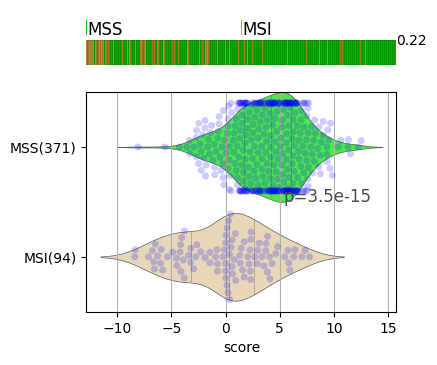

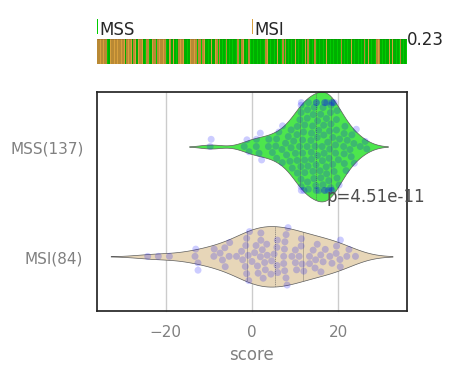

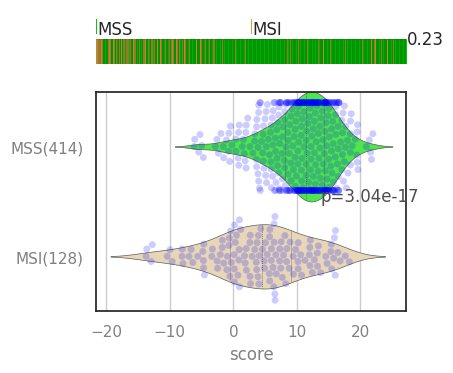

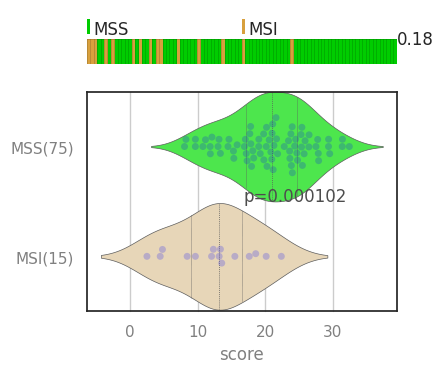

In [8]:
#Refined C13

wt1,l1=getCls13a14a3()

ana = IMMAnalysis()
ana.get_TCGA_2017()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)


ana = IMMAnalysis()
ana.get_Global_2012()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)


ana = IMMAnalysis()
ana.get_MSI_2013()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)



ana = IMMAnalysis()
ana.get_Roepman()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)



### CIMP Status

[4228, 4200, 2, 3123, 3289, 168, 14, 4252, 440, 51, 30, 14, 4207, 4200, 2, 7516, 25, 116, 78, 74, 122, 142, 4198, 2, 4250, 66, 2, 8, 144, 107, 14]
[66, 144, 168]
[48, 137, 153]
[-1, 1, 2]
Feraccin 2007 Colon Cancer (n = 54)
E-TABM-328 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC52
51 [11, 40] E-TABM-328 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC52 CRC52
[22, 0, 0]
Marisa 2013 Colon Cancer (n = 585)
GSE39582 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC54
513 [93, 420] GSE39582 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC54 CRC54
[41, 0, 0]
Kirzin 2014 Colon (n = 70)
GSE39084 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC58
69 [13, 56] GSE39084 http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC58 CRC58
[41, 0, 0]
TCGA 2017 COAD mRNA (n = 521)
TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC78
371 [87, 284] TCGA http://hegemon.ucsd.edu/Tools/explore.php?key=colon&id=CRC78 CRC78
[16, 0, 0]


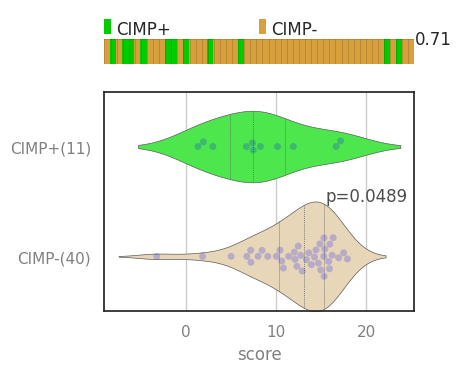

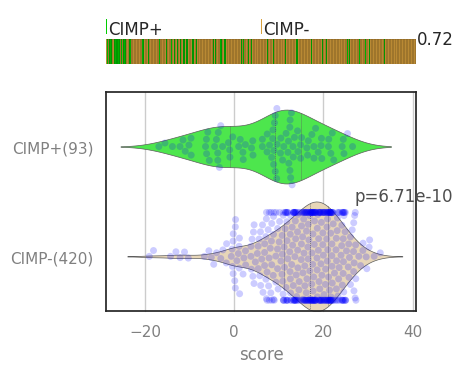

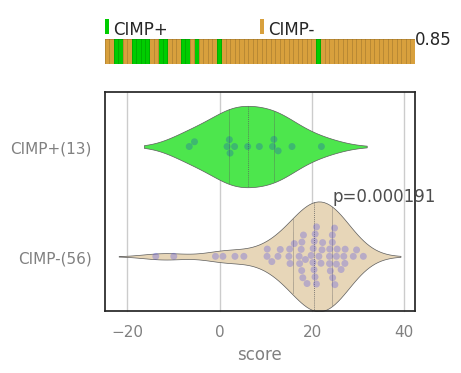

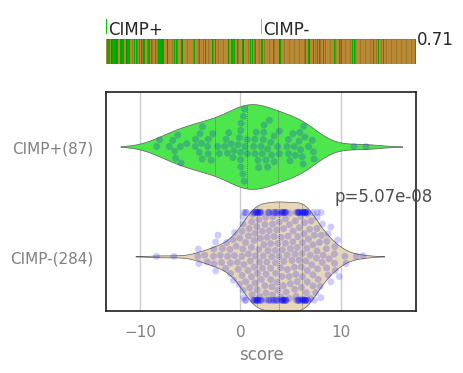

In [11]:
#Refined C13 
wt1,l1=getCls13a14a3()

ana = IMMAnalysis()
ana.get_Feraccin_2007()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)

ana = IMMAnalysis()
ana.get_Marisa_2013()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)

ana = IMMAnalysis()
ana.get_Kirzin_2014()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)

ana = IMMAnalysis()
ana.get_TCGA_2017_2()
fig = bone.processData(ana, [good_signature[0],set(),set()], wt1, desc=None, violin=1)
